## **How to determine correct number of clusters (k)?** **| |Elbow Curve Method| |**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , KFold
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [4]:
df.describe(exclude='object')

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [5]:
correlation = df[['Age','Income($)']]
hmap = correlation.corr()
hmap

,Age,Income($)
Age,1.000000,0.496856
Income($),0.496856,1.000000


In [6]:
fig=px.scatter(df, x ='Age' , y ='Income($)' , color = 'Age')
fig.show()

**By Looking at the above Scatter plot we can clearly see that there are 3 clusters wo can Implement KMeans Algo**

In [8]:
km = KMeans(n_clusters=3)
km.fit(correlation) #<------ correlation = df['Age','Income($)']
y_predicted = km.predict(correlation)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [10]:
df['cluster']= y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [11]:
# Centroid of Clusters
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [12]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

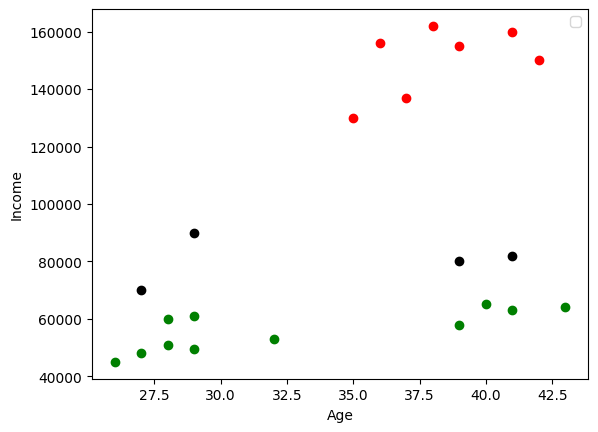

In [18]:
plt.scatter (df0. Age, df0[ 'Income($)'], color='green')
plt.scatter(df1. Age, df1[ 'Income($)'], color='red')
plt.scatter(df2. Age, df2 [ 'Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

**Our cluster is bad , because our scaling is disturbed in the above plot**

**2nd half or actual code starts from here:**

In [20]:
scaler = MinMaxScaler()
scaler.fit(df[ ['Income($)'] ] )
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


**Question here is : why do use MinMaxScaler() ?**

In [21]:
df['Income($)']

0     0.213675
1     0.384615
2     0.136752
3     0.128205
4     0.897436
5     0.940171
6     0.982906
7     1.000000
8     0.948718
9     0.726496
10    0.786325
11    0.000000
12    0.025641
13    0.051282
14    0.038462
15    0.068376
16    0.170940
17    0.153846
18    0.162393
19    0.299145
20    0.316239
21    0.111111
Name: Income($), dtype: float64

In [22]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [23]:
df['Age']

0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64

In [24]:
fig = px.scatter(df , x='Age', y = 'Income($)', color='cluster')
fig.show()

In [30]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [31]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [32]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [33]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

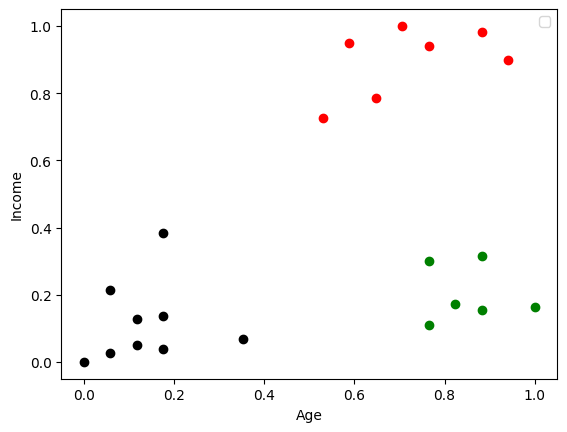

In [34]:
plt.scatter (df0. Age, df0[ 'Income($)'], color='green')
plt.scatter(df1. Age, df1[ 'Income($)'], color='red')
plt.scatter(df2. Age, df2 [ 'Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

**Question here is : How to visualize centroids of clusters ?**

**To find appropriate no of clusters , for more features in data we'll plot Elbow Curve**

In [35]:
sse = []

k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)                                  #<---------- SSE (Sum of Squared Error)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [36]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009398,
 0.17299621932455467,
 0.13265419827245162,
 0.10740235405674733]

**Elbow Curve Plot using simple (plot)**

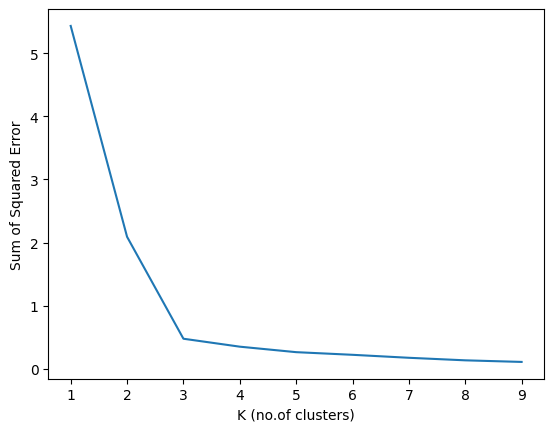

In [38]:
plt.xlabel("K (no.of clusters)")
plt.ylabel('Sum of Squared Error')
plt.plot(k_range , sse)

#Exercise :

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop
other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k